# Statistically meaningful charts

## Seaborn

The next module we will explore is Seaborn. Seaborn is a Python visualization library based on matplotlib. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels. It provides a high-level interface for drawing attractive statistical graphics... emphasis on STATISTICS. You don't want to use Seaborn as a general purpose charting libray.

http://web.stanford.edu/~mwaskom/software/seaborn/index.html


In [9]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

### Load up some test data to play with

In [2]:
tips = sns.load_dataset("tips")
tips.rename(columns={'smoker': 'drinker', 'sex': 'gender'}, inplace=True) # Just a little column renaming
tips.head()

,total_bill,tip,gender,drinker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips[['total_bill','tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


### Plotting linear regression models

http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html



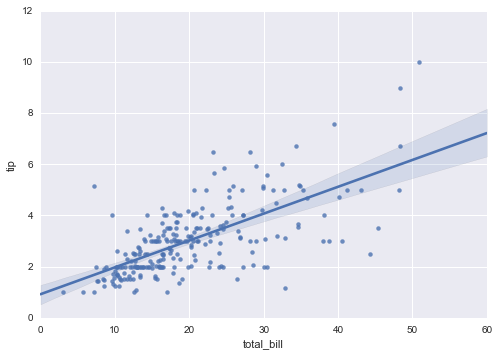

In [4]:
sns.regplot(x="total_bill", y="tip", data=tips);

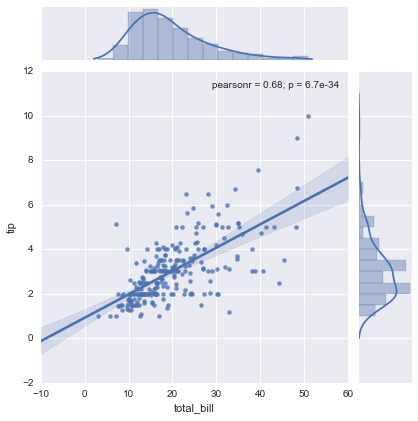

In [5]:
sns.jointplot("total_bill", "tip", tips, kind='reg');

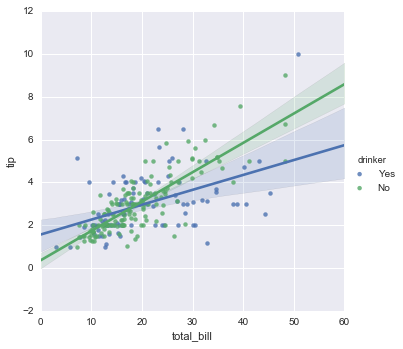

In [6]:
sns.lmplot(x="total_bill", y="tip", hue="drinker", data=tips)

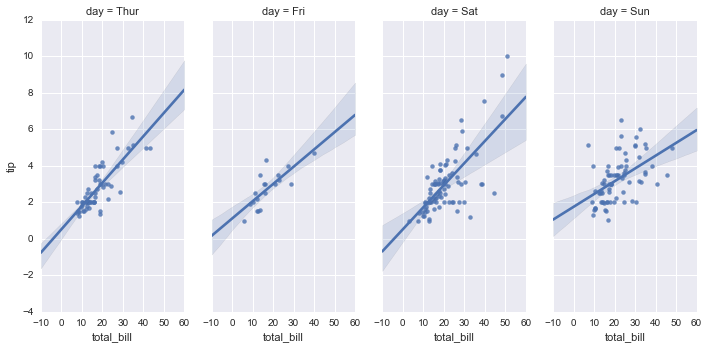

In [7]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.5)

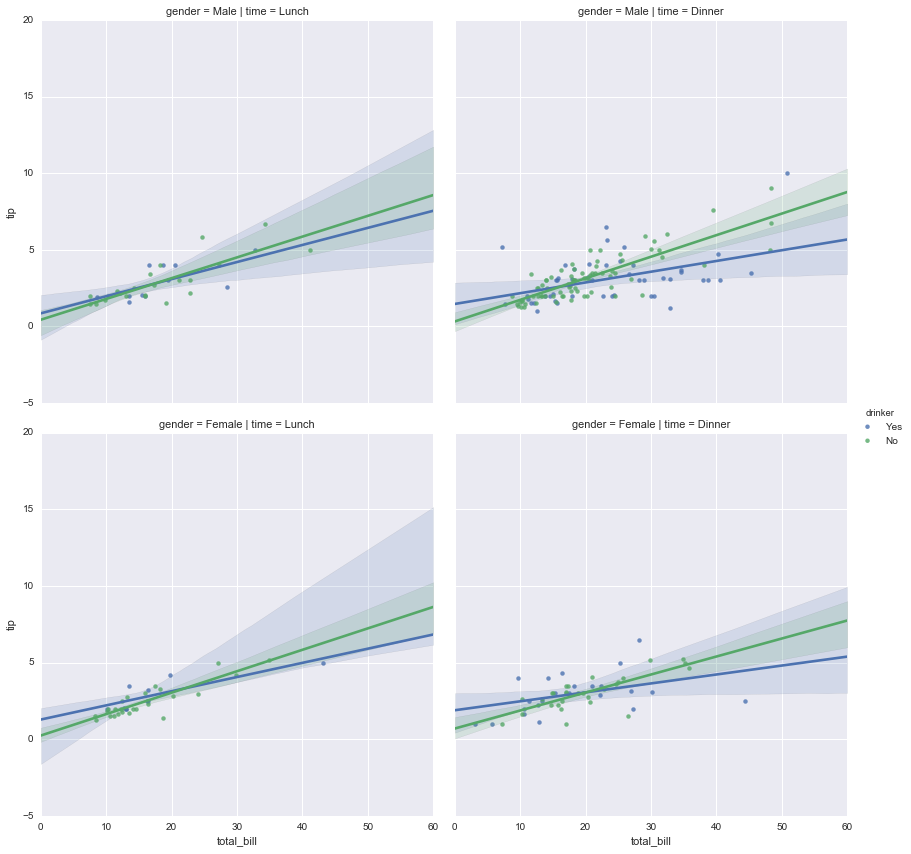

In [8]:
sns.lmplot(x="total_bill", y="tip", hue='drinker', col="time", row='gender', size=6, data=tips);